# Prediction and ploting in one PDF file

Before running this script, you must create the following folders in the directory where your Python notebook is located:
1. ./output/predictions/train/plots -- folder for saving training plots
2. ./output/predictions/test/plots -- folder for saving test plots 
3. ./output/predictions/val/plots -- folder for saving validation plots
4. ./output/predictions/train/data -- folder for sving train data
5. ./output/predictions/test/data -- folder for saving test data
6. ./output/predictions/val/data -- folder for saving val data

In [1]:
import QNPy #Importing the package
from QNPy import PREDICTION_onePDF as prp #Importing PREDICTION module from the package
from QNPy.PREDICTION_onePDF import * #Importing importing all packages from PREDICTION module
from QNPy.PREDICTION_onePDF import plot_function #The functions plot_function must be imported separately

In [2]:
#defining the device, it can be cpu of cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
# Creating all needed folders
# If you already manually created prediction folders, this can be scipped
prp.create_prediction_folders()


Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [4]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [5]:
prp.clear_output_dir(OUTPUT_PATH)#clearing outputh dir. It can be sciped

In [6]:
model = prp.load_model(MODEL_PATH, device) #loading the model

In [7]:
criterion, mseMetric= prp.get_criteria()#loading criterion and metrics from model

In [8]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/test"  # Change this to your dataset folder

prp.remove_padded_values_and_filter(folder_path)

Removed padding in file: 3_original_split22.csv


In [9]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/train"  # Change this to your dataset folder

prp.remove_padded_values_and_filter(folder_path)

Removed padding in file: 9_original_split23.csv
Removed padding in file: 4_original_split21.csv
Removed padding in file: 1_original_split7.csv
Removed padding in file: 7_original_split12.csv


In [10]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/val"  # Change this to your dataset folder

prp.remove_padded_values_and_filter(folder_path)

Removed padding in file: 5_original_split17.csv
Removed padding in file: 2_original_split16.csv
Removed padding in file: 8_original_split28.csv
Removed padding in file: 10_original_split19.csv
Removed padding in file: 6_original_split10.csv


In [11]:
testSet, testLoader=prp.load_test_data(DATA_PATH_TEST)#loading test data

In [12]:
trainSet, trainLoader=prp.load_train_data(DATA_PATH_TRAIN)#loading trained data

In [13]:
valSet, valLoader = prp.load_val_data(DATA_PATH_VAL)#loading validation data

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.06it/s]

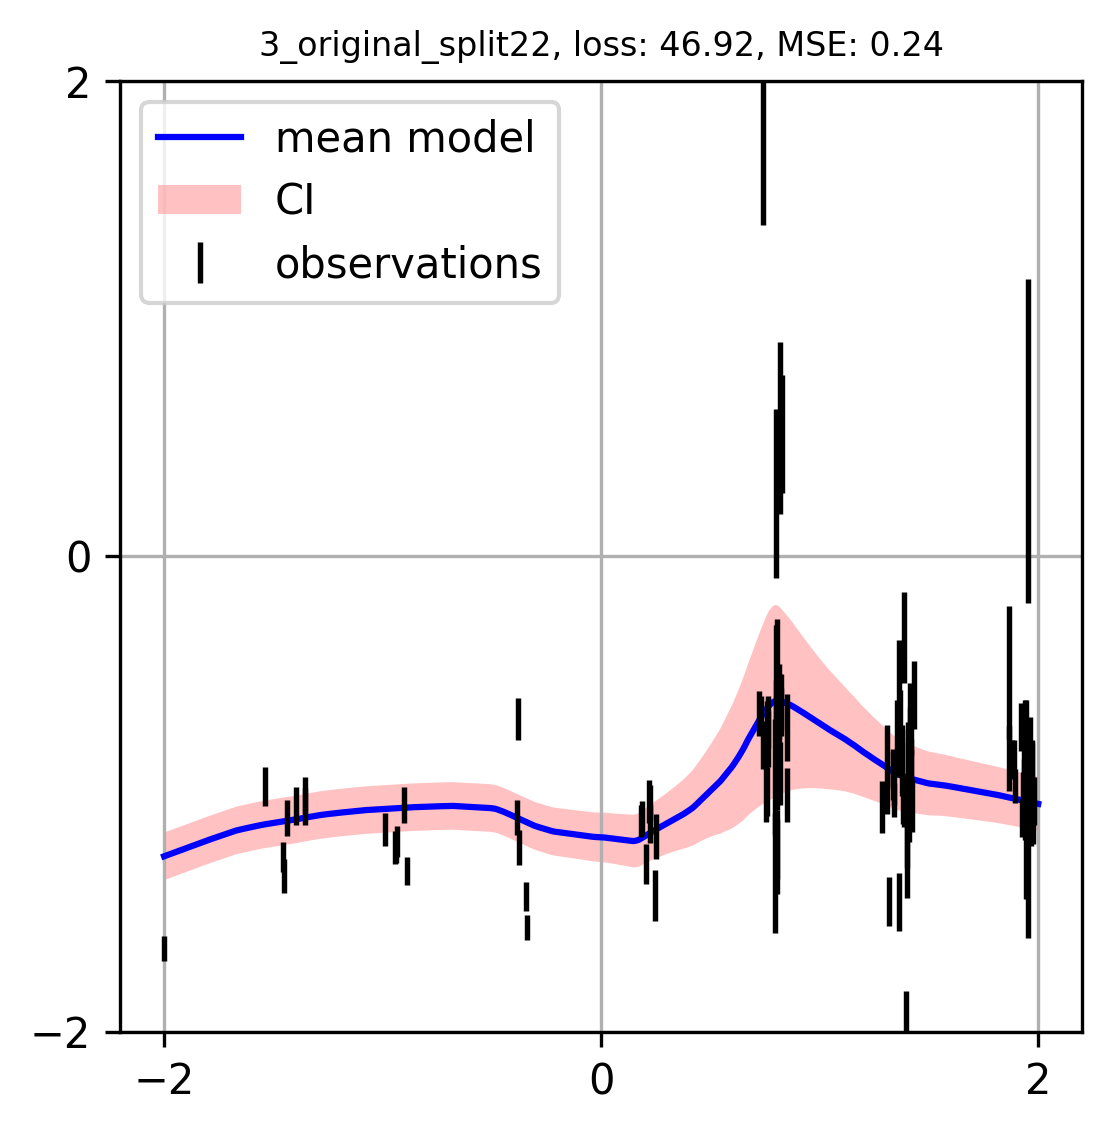

In [14]:
#plotting the test data
testMetrics=prp.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function, device)

In [15]:
save_Test_Metrics=prp.save_test_metrics(OUTPUT_PATH, testMetrics)#saving test metrics

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.63it/s]


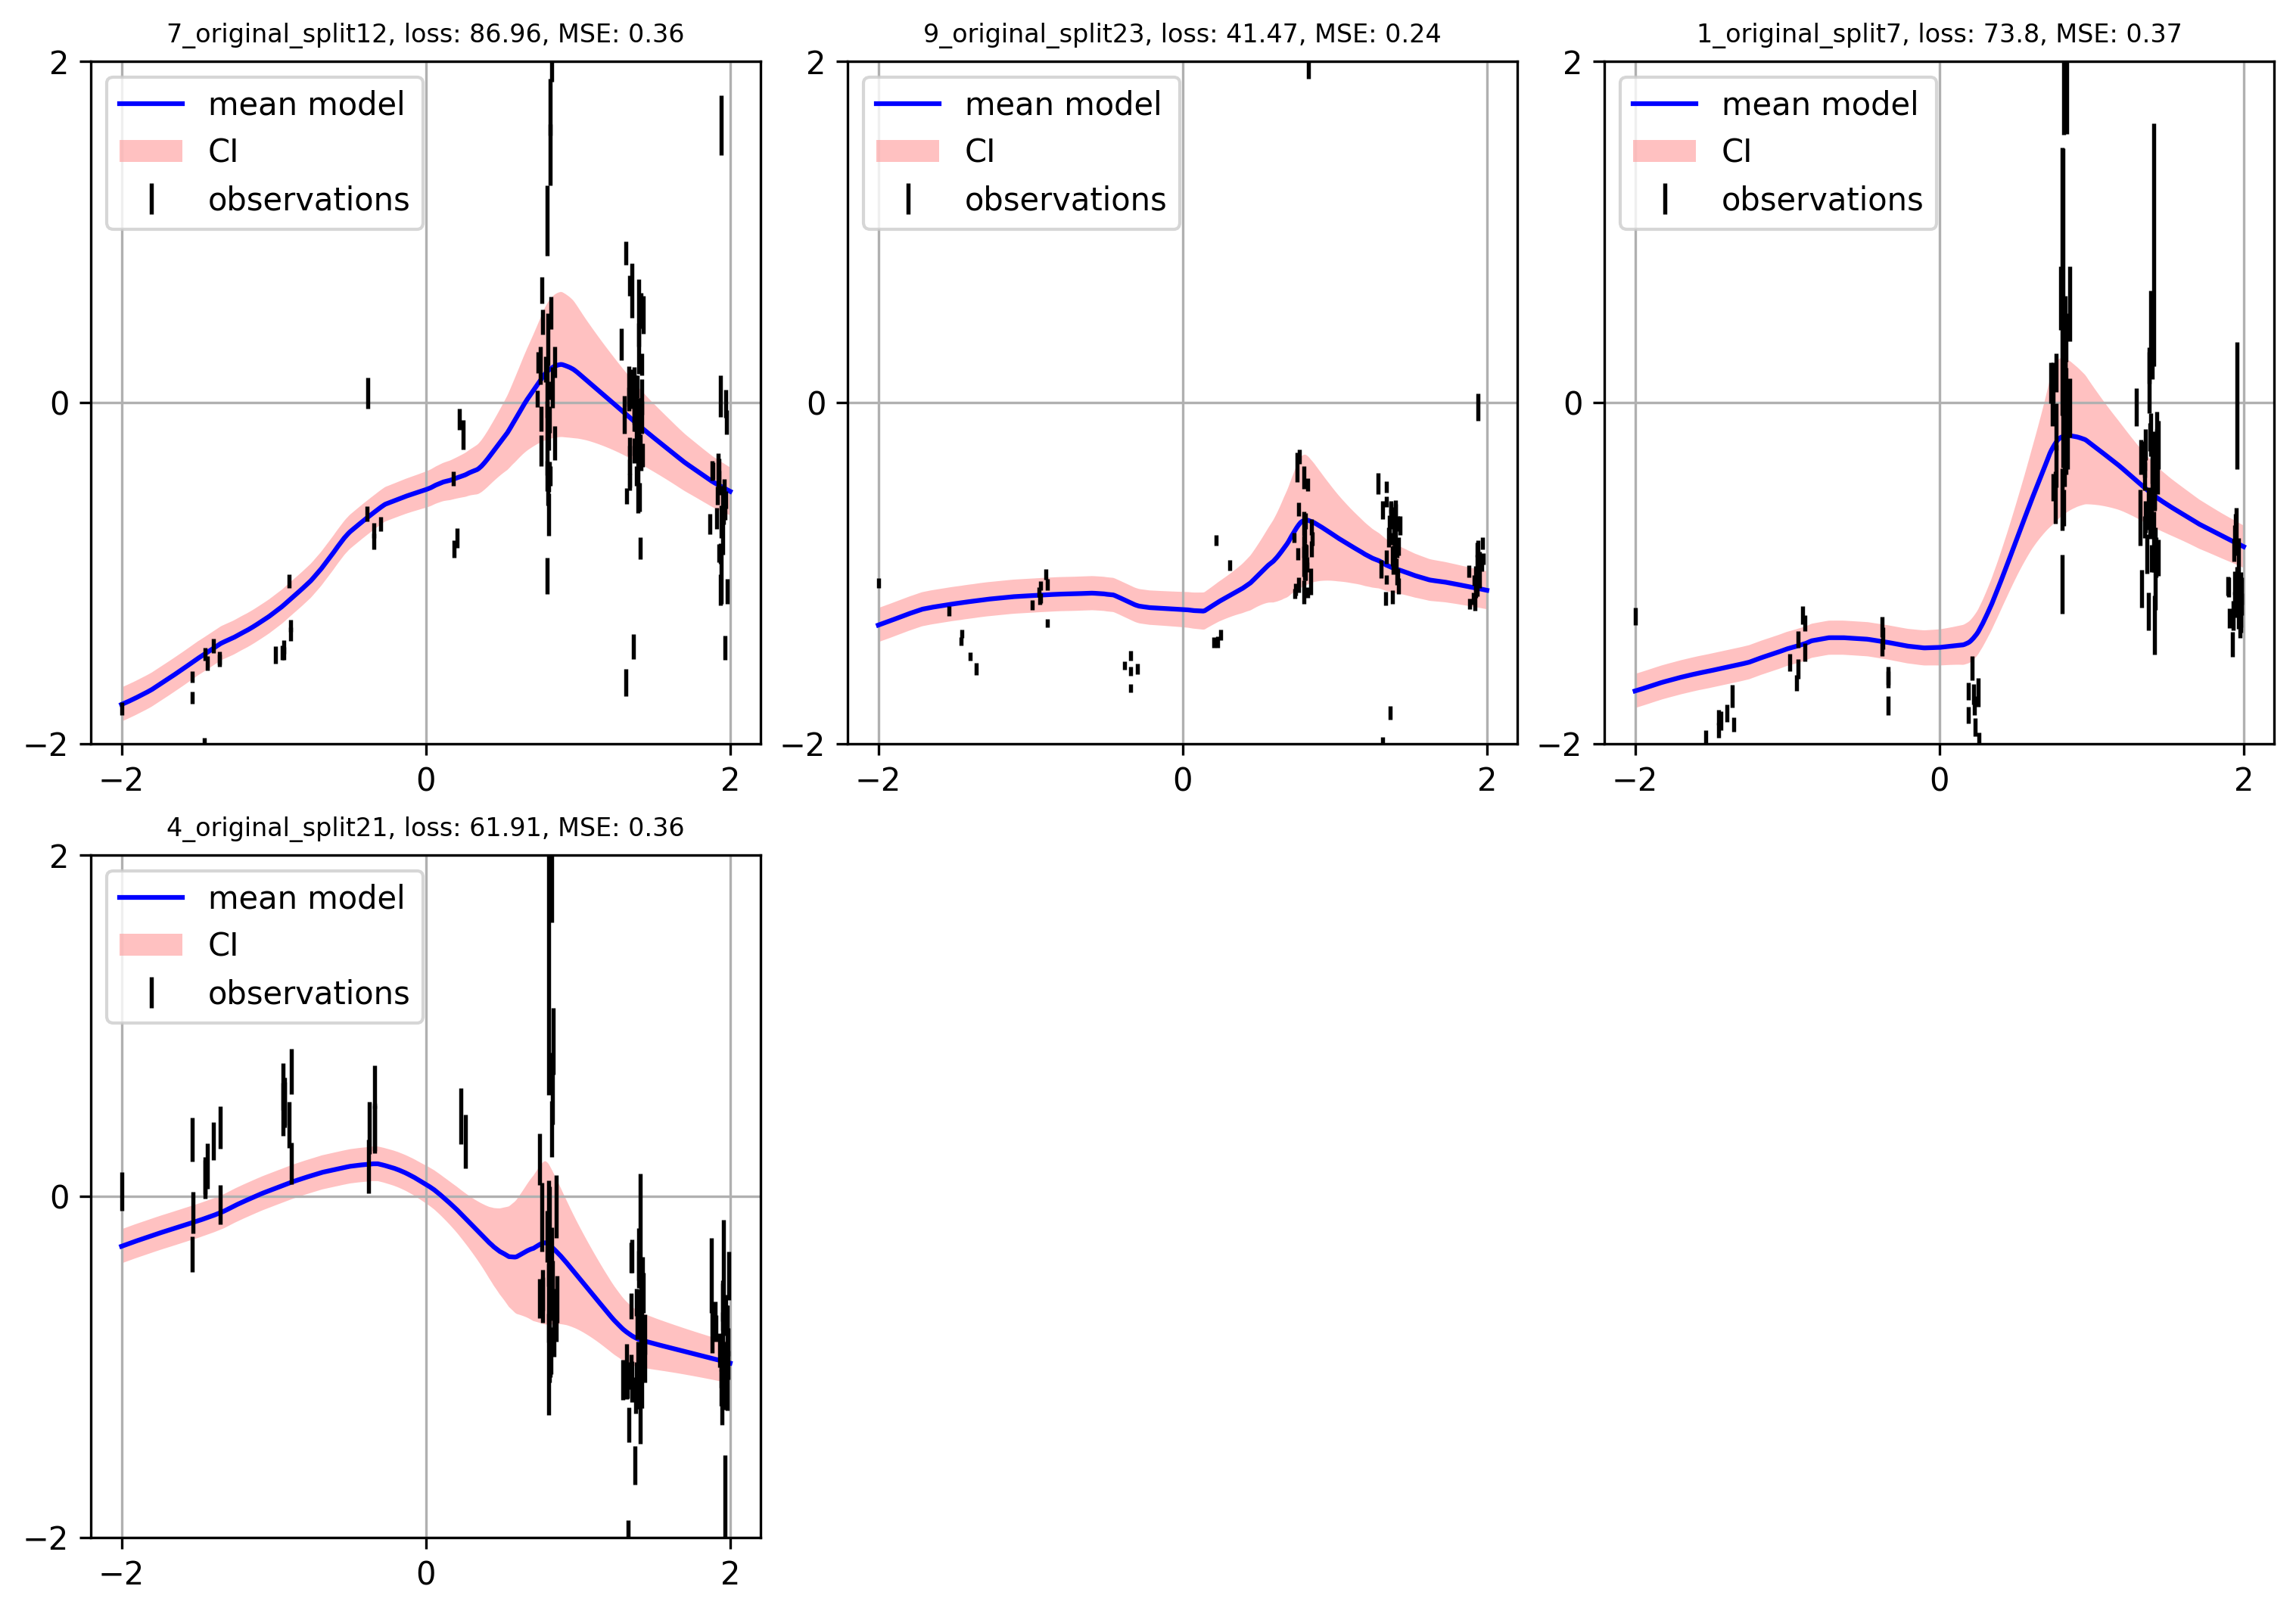

In [16]:
#plotting the train data
trainMetrics=prp.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function, device)

In [17]:
save_Train_metrics=prp.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 27.73it/s]


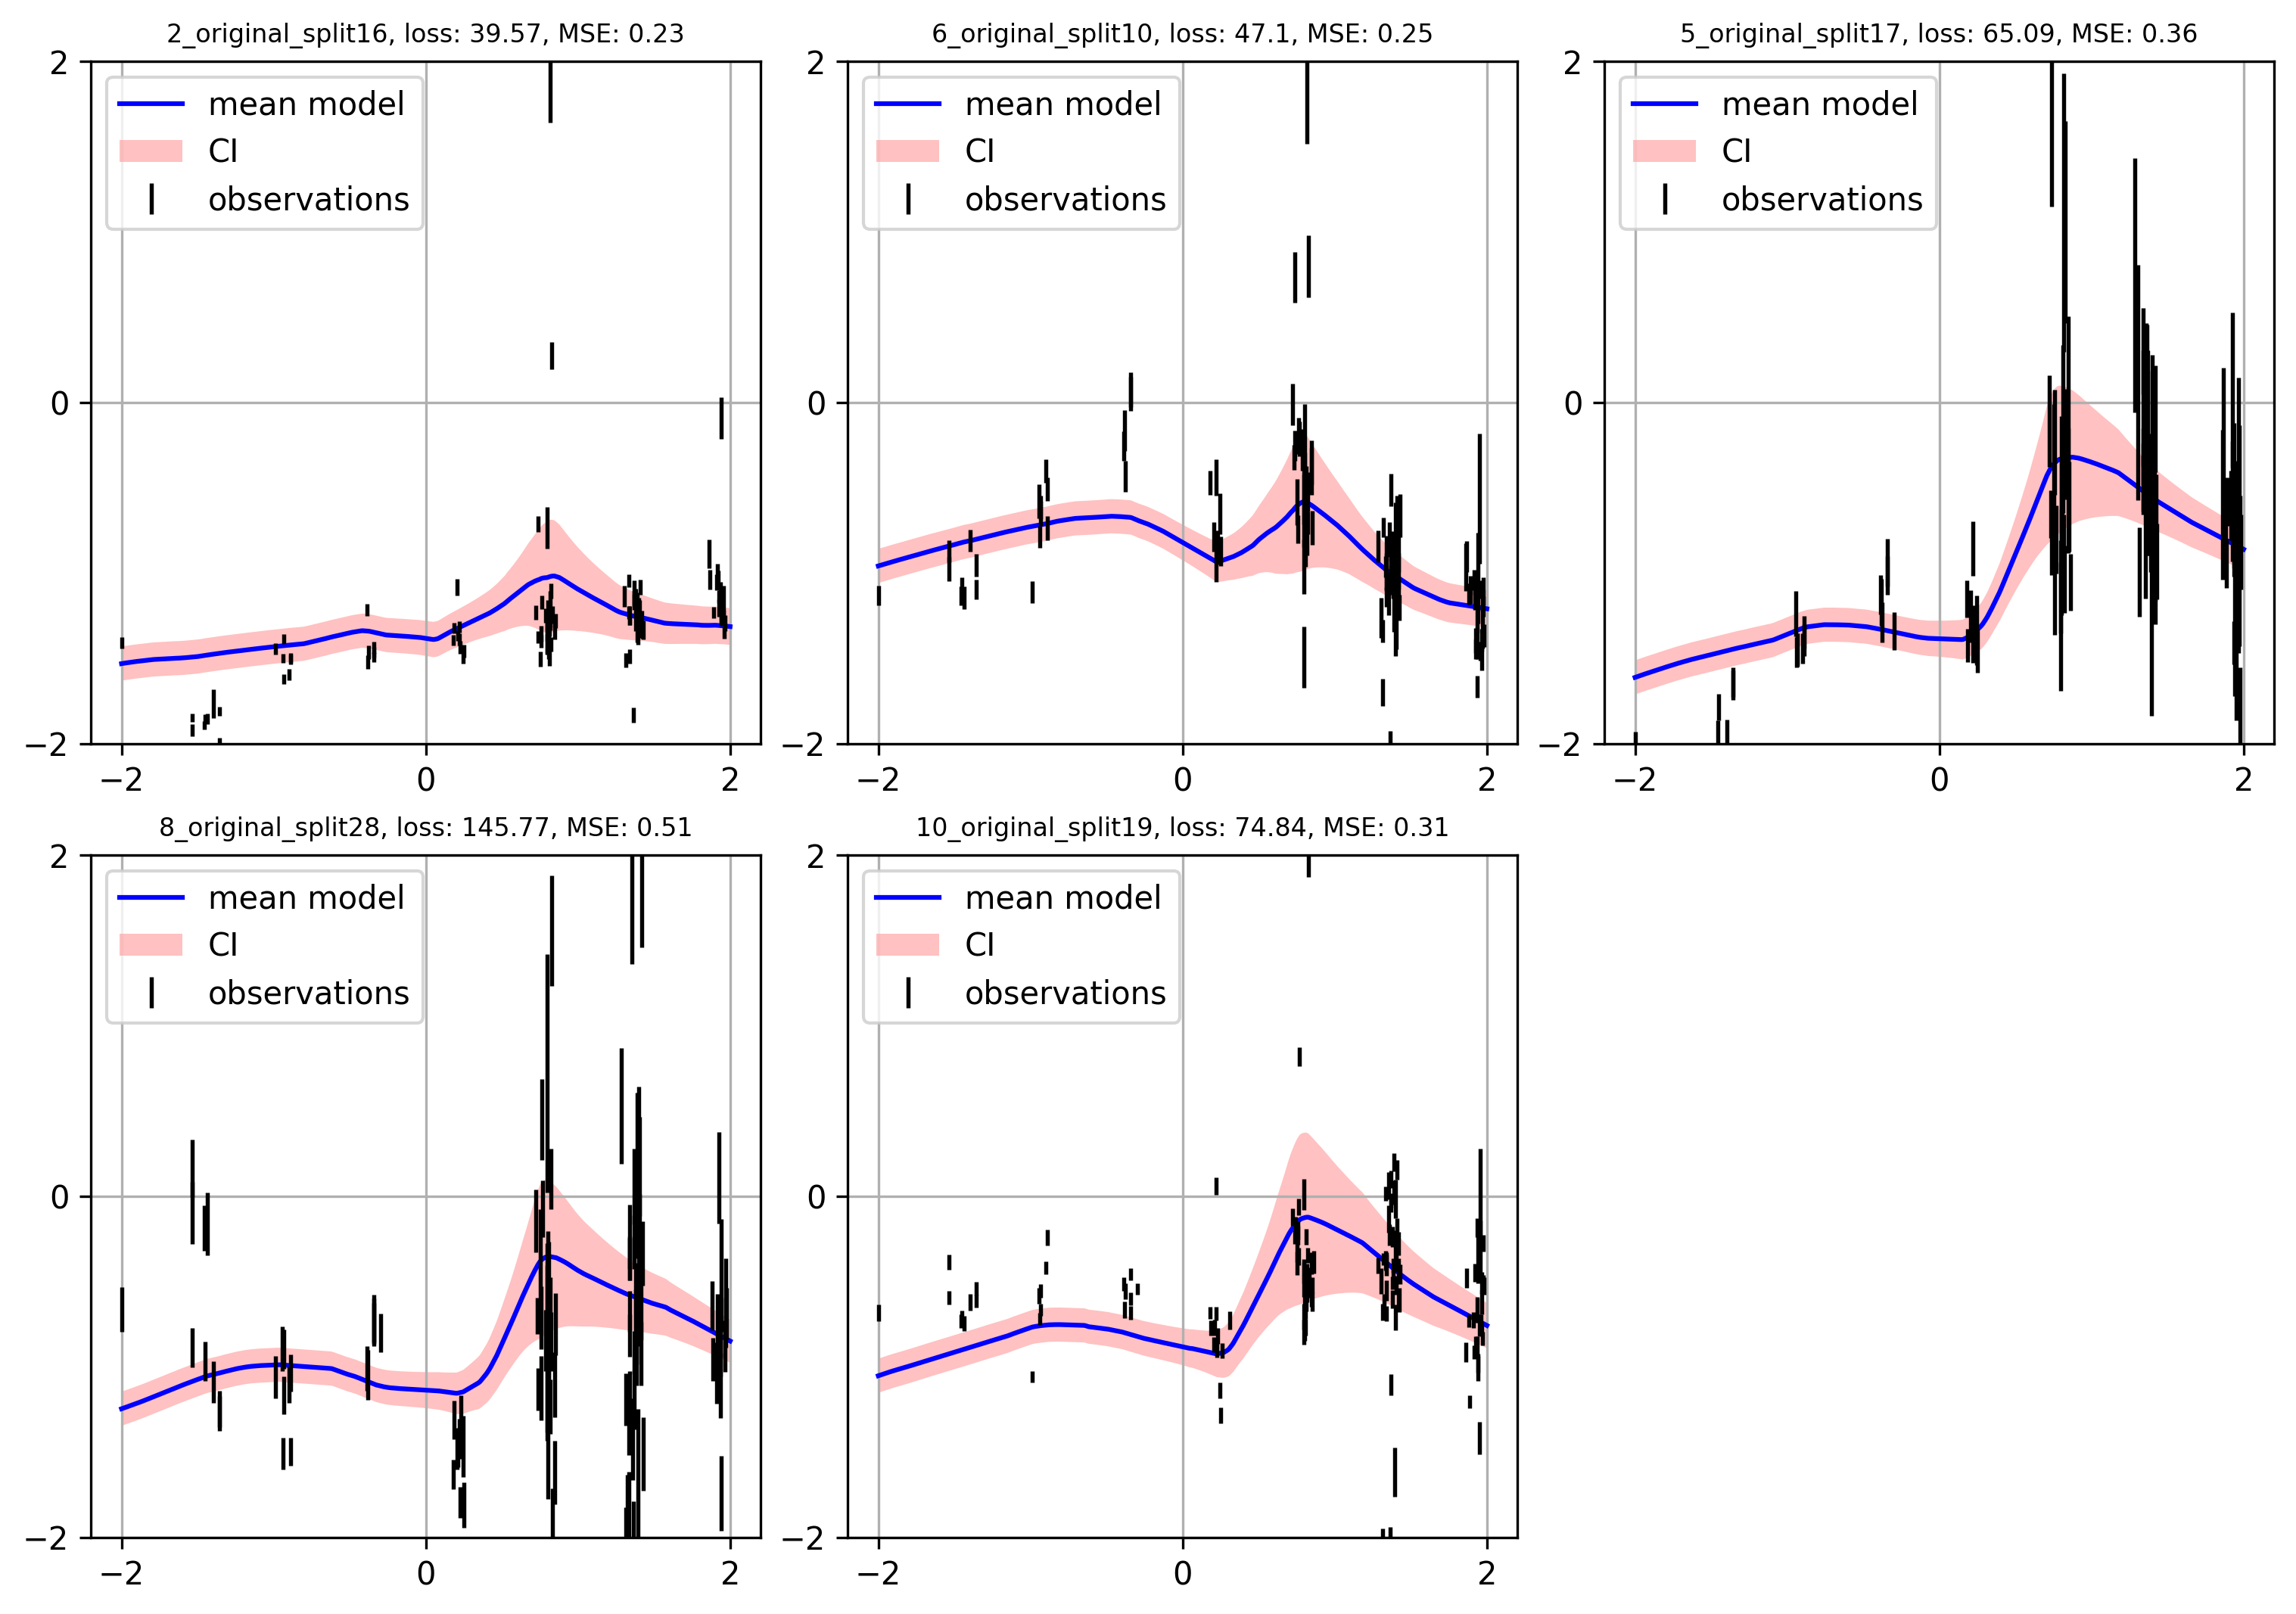

In [18]:
#plotting the val data
valMetrics=prp.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function, device)

In [19]:
save_Val_metrics=prp.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics